In [149]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import cross_val_score

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

%matplotlib inline

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [151]:
# Data preparation

In [152]:
df = pd.read_csv("/Users/Gustavodamasco/Desktop/Datasets/Spending_habits/Responses.csv")

In [153]:
df_spending = df.iloc[:, 133]

In [154]:
df_personality = df.iloc[:, 76:133]

In [155]:
df_data = pd.concat((df_personality, df_spending), axis=1)

In [156]:
lying_dummies = pd.get_dummies(df_data["Lying"], prefix="Lying").iloc[:, 1:]
ponctuality_dummies = pd.get_dummies(df_data["Punctuality"], prefix="Punctuality").iloc[:, 1:]
internet_usage_dummies = pd.get_dummies(df_data["Internet usage"], prefix="Internet usage").iloc[:, 1:]

In [157]:
df_data_model = pd.concat([df_data, lying_dummies, ponctuality_dummies, internet_usage_dummies], axis=1)

In [158]:
df_data_model = df_data_model.drop(["Lying", "Punctuality", "Internet usage"], axis=1)

In [159]:
df_data_model.loc[df_data_model['Finances'] <= 3, 'Finances'] = 0
df_data_model.loc[df_data_model['Finances'] > 3, 'Finances'] = 1

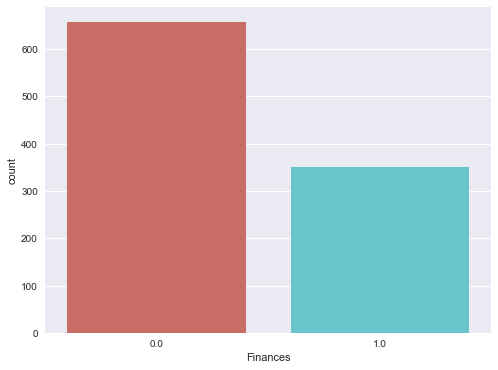

In [160]:
sns.countplot(x = "Finances", data = df_data_model, palette = "hls")

In [161]:
df_data_model.head()

,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,...,Questionnaires or polls,Finances,Lying_never,Lying_only to avoid hurting someone,Lying_sometimes,Punctuality_i am often early,Punctuality_i am often running late,Internet usage_less than an hour a day,Internet usage_most of the day,Internet usage_no time at all
0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,...,3.0,0.0,1,0,0,0,0,0,0,0
1,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,...,3.0,0.0,0,0,1,1,0,0,0,0
2,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,...,1.0,0.0,0,0,1,0,1,0,0,0
3,4.0,4.0,4.0,5.0,3.0,1.0,3.0,4.0,5.0,2.0,...,4.0,0.0,0,1,0,1,0,0,1,0
4,3.0,1.0,2.0,3.0,5.0,5.0,5.0,4.0,2.0,3.0,...,3.0,1.0,0,0,0,0,0,0,0,0


In [162]:
total = df_data_model['Finances'].value_counts()[0] + df_data_model['Finances'].value_counts()[1]

In [163]:
df_data_model['Finances'].value_counts()

0.0    657
1.0    350
Name: Finances, dtype: int64

In [164]:
df_data_model['Finances'].value_counts()[0] / float(total)

0.65243296921549154

In [165]:
df_data_model['Finances'].value_counts()[1] / float(total)

0.34756703078450846

In [166]:
df_data_model_dropped = df_data_model.dropna(axis=0).copy()
df_data_model_dropped.shape

(864, 63)

In [167]:
df_data_model_mode = df_data_model.copy()

In [168]:
for i in df_data_model_mode.columns:
    df_data_model_mode[i].fillna(df_data_model_mode[i].mode()[0], inplace=True)

In [169]:
df_data_model_mode.shape

(1010, 63)

In [170]:
X = df_data_model_dropped.drop("Finances", axis=1)
y = df_data_model_dropped["Finances"]

X1 = df_data_model_mode.drop("Finances", axis=1)
y1 = df_data_model_mode["Finances"]

In [171]:
# Model Evaluation - KNN

In [172]:
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

In [173]:
# define the parameter values that should be searched
k_range = list(range(1, 200, 10))
print(k_range)

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191]


In [174]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid_knn = dict(n_neighbors=k_range)
print(param_grid_knn)

{'n_neighbors': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191]}


In [175]:
# instantiate the grid
grid_knn = GridSearchCV(knn, param_grid_knn, cv=10, scoring='roc_auc')

In [176]:
# fit the grid with data
grid_knn.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 11, 21, 31, 41, 51, 61, 71, 81, 91, 101, 111, 121, 131, 141, 151, 161, 171, 181, 191]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [177]:
# view the complete results (list of named tuples)
grid_knn.grid_scores_

[mean: 0.50965, std: 0.05518, params: {'n_neighbors': 1},
 mean: 0.58463, std: 0.06492, params: {'n_neighbors': 11},
 mean: 0.59829, std: 0.05838, params: {'n_neighbors': 21},
 mean: 0.62391, std: 0.05673, params: {'n_neighbors': 31},
 mean: 0.63626, std: 0.05581, params: {'n_neighbors': 41},
 mean: 0.65768, std: 0.05946, params: {'n_neighbors': 51},
 mean: 0.65731, std: 0.05308, params: {'n_neighbors': 61},
 mean: 0.66509, std: 0.05575, params: {'n_neighbors': 71},
 mean: 0.67653, std: 0.05423, params: {'n_neighbors': 81},
 mean: 0.68206, std: 0.05881, params: {'n_neighbors': 91},
 mean: 0.68467, std: 0.05993, params: {'n_neighbors': 101},
 mean: 0.69377, std: 0.05906, params: {'n_neighbors': 111},
 mean: 0.68935, std: 0.05850, params: {'n_neighbors': 121},
 mean: 0.69045, std: 0.06018, params: {'n_neighbors': 131},
 mean: 0.69474, std: 0.06248, params: {'n_neighbors': 141},
 mean: 0.69296, std: 0.06046, params: {'n_neighbors': 151},
 mean: 0.68941, std: 0.06450, params: {'n_neighbors

In [178]:
# create a list of the mean scores only
grid_mean_scores = [result.mean_validation_score for result in grid_knn.grid_scores_]
print(grid_mean_scores)

[0.5096464052487237, 0.5846325639588409, 0.5982874095861328, 0.6239148457016399, 0.6362591125023921, 0.6576791843970944, 0.6573105123172327, 0.6650943256328001, 0.6765258855354621, 0.6820580517153098, 0.6846716452479222, 0.693774577330525, 0.689350142651554, 0.6904463905891995, 0.6947360429047258, 0.6929614929698935, 0.6894063119029517, 0.6895923480516893, 0.6921995896626275, 0.6887146575360622]


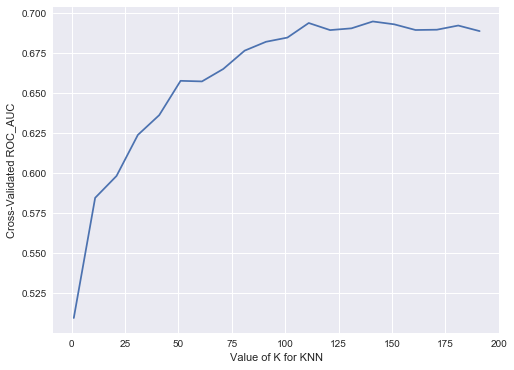

In [179]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated ROC_AUC')

In [180]:
# examine the best model
print(grid_knn.best_score_)
print(grid_knn.best_params_)
print(grid_knn.best_estimator_)

0.694736042905
{'n_neighbors': 141}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=141, p=2,
           weights='uniform')


In [181]:
# Model Evaluation - Random Forest

In [248]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

Rforest = RandomForestClassifier()

In [249]:
# define the parameter values that should be searched
#n_estimators = list(range(100, 500, 50))
max_depth = [3, 4, 5, 6, 7, 8]
#max_features = ['auto', 3,4,5,6,7]
#print(n_estimators)
print(max_depth)
#print(max_features)

[3, 4, 5, 6, 7, 8]


In [250]:
# create a parameter grid: map the parameter names to the values that should be searched
#param_grid_Rforest = dict(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features)
param_grid_Rforest = dict(max_depth = max_depth)
print(param_grid_Rforest)

{'max_depth': [3, 4, 5, 6, 7, 8]}


In [251]:
# instantiate the grid
#grid_Rforest = GridSearchCV(Rforest, param_grid_Rforest, cv=10, scoring='roc_auc')
grid_Rforest = GridSearchCV(Rforest, param_grid_Rforest, cv=10, scoring='roc_auc')

In [252]:
# fit the grid with data
grid_Rforest.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [253]:
# view the complete results (list of named tuples)
grid_Rforest.grid_scores_

[mean: 0.66583, std: 0.06605, params: {'max_depth': 3},
 mean: 0.65629, std: 0.07203, params: {'max_depth': 4},
 mean: 0.64330, std: 0.05499, params: {'max_depth': 5},
 mean: 0.61912, std: 0.05681, params: {'max_depth': 6},
 mean: 0.60642, std: 0.06694, params: {'max_depth': 7},
 mean: 0.62139, std: 0.06018, params: {'max_depth': 8}]

# Steps
1. Split data into train_test_split
2. Use train data into grid search and get new grid search hyper parameters, save into different variable
3. Use testX into old grid search and new grid search to get predict_y (y-hat)
4. Use testX and testY into old grid search and new grid search to get score
5. Look at feature importance between old grid search and new grid search

In [254]:
# examine the best model
print(grid_Rforest.best_score_)
print(grid_Rforest.best_params_)
print(grid_Rforest.best_estimator_)

0.66582598256
{'max_depth': 3}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [260]:
predict_y = grid_Rforest.predict(df_data_model

/Users/Gustavodamasco/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Number of features of the model must match the input. Model n_features is 62 and input n_features is 864 

In [264]:
grid_Rforest.best_estimator_.feature_importances_

array([ 0.        ,  0.06433398,  0.        ,  0.01062123,  0.00845156,
        0.02525913,  0.06876486,  0.08215306,  0.04066634,  0.00734565,
        0.0231583 ,  0.        ,  0.00360422,  0.08626629,  0.01443386,
        0.02347582,  0.        ,  0.01796067,  0.00505539,  0.        ,
        0.01886617,  0.        ,  0.02557355,  0.        ,  0.01221342,
        0.00601546,  0.        ,  0.        ,  0.00400692,  0.01712512,
        0.02436848,  0.        ,  0.        ,  0.00904615,  0.02023667,
        0.        ,  0.00634749,  0.        ,  0.03704486,  0.        ,
        0.00700059,  0.02809517,  0.01959017,  0.01933228,  0.        ,
        0.01000573,  0.        ,  0.02541672,  0.        ,  0.03218137,
        0.02564974,  0.01544502,  0.00830024,  0.00791219,  0.        ,
        0.        ,  0.0029338 ,  0.0360979 ,  0.0732938 ,  0.02635063,
        0.        ,  0.        ])

In [265]:
#extracting importance of features

features = X.columns
feature_importances = grid_Rforest.best_estimator_.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

features_df.head(10)

,Features,Importance Score
13,Decision making,0.086266
7,Keeping promises,0.082153
58,Punctuality_i am often running late,0.073294
6,Reliability,0.068765
1,Prioritising workload,0.064334
8,Loss of interest,0.040666
38,Children,0.037045
57,Punctuality_i am often early,0.036098
49,Finding lost valuables,0.032181
41,Knowing the right people,0.028095


In [261]:
predict_y = grid_Rforest.predict(test_X)

In [263]:
from sklearn.metrics import classification_report, confusion_matrix

print confusion_matrix(predict_y, y)
print classification_report(predict_y, y)

[[554 275]
 [  4  31]]
             precision    recall  f1-score   support

        0.0       0.99      0.67      0.80       829
        1.0       0.10      0.89      0.18        35

avg / total       0.96      0.68      0.77       864



In [232]:
# Model Evaluation - Logistic Regression

In [233]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

Logreg = LogisticRegression()

In [234]:
# define the parameter values that should be searched
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty = ['l1','l2']
print(C)
print(penalty)

[0.001, 0.01, 0.1, 1, 10, 100, 1000]
['l1', 'l2']


In [235]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid_Logreg = dict(C = C, penalty = penalty)
print(param_grid_Logreg)

{'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


In [236]:
# instantiate the grid
grid_Logreg = GridSearchCV(Logreg, param_grid_Logreg, cv=10, scoring='accuracy')

In [237]:
# fit the grid with data
grid_Logreg.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [238]:
# view the complete results (list of named tuples)
grid_Logreg.grid_scores_

[mean: 0.64583, std: 0.00296, params: {'penalty': 'l1', 'C': 0.001},
 mean: 0.65856, std: 0.01422, params: {'penalty': 'l2', 'C': 0.001},
 mean: 0.64583, std: 0.00296, params: {'penalty': 'l1', 'C': 0.01},
 mean: 0.67014, std: 0.03022, params: {'penalty': 'l2', 'C': 0.01},
 mean: 0.68171, std: 0.02905, params: {'penalty': 'l1', 'C': 0.1},
 mean: 0.65856, std: 0.03049, params: {'penalty': 'l2', 'C': 0.1},
 mean: 0.65394, std: 0.03029, params: {'penalty': 'l1', 'C': 1},
 mean: 0.65394, std: 0.02708, params: {'penalty': 'l2', 'C': 1},
 mean: 0.65972, std: 0.03045, params: {'penalty': 'l1', 'C': 10},
 mean: 0.66204, std: 0.02936, params: {'penalty': 'l2', 'C': 10},
 mean: 0.65741, std: 0.02763, params: {'penalty': 'l1', 'C': 100},
 mean: 0.65741, std: 0.02992, params: {'penalty': 'l2', 'C': 100},
 mean: 0.65741, std: 0.02964, params: {'penalty': 'l1', 'C': 1000},
 mean: 0.65625, std: 0.02886, params: {'penalty': 'l2', 'C': 1000}]

In [239]:
# examine the best model
print(grid_Logreg.best_score_)
print(grid_Logreg.best_params_)
print(grid_Logreg.best_estimator_)

0.681712962963
{'penalty': 'l1', 'C': 0.1}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
